# Skilled Nursing Facility Analysis

![Untitled%20%28Presentation%20(169%29)%20(1920%20%C3%97%20500%20px).png](attachment:Untitled%20%28Presentation%20(169%29)%20(1920%20%C3%97%20500%20px).png)
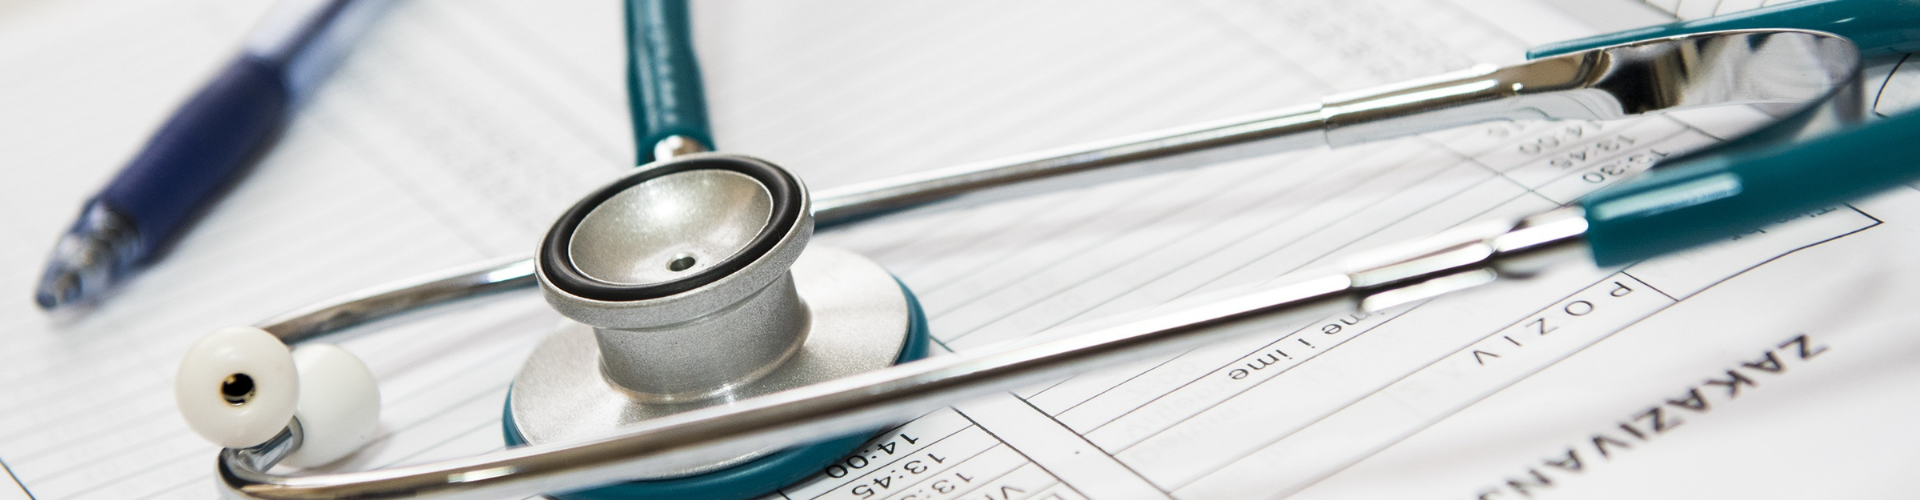

### Import Packages

In [127]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime
import time
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


##HELPER FUNCTIONS##
def create_histogram(df, column_name, title):
    '''
    Input dataframe, column name to build histogram off of, and graph title.
    Outputs nicely styled histogram for project.
    '''
    #styling
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Helvetica'
    plt.figure(figsize=(10, 5))
    plt.style.use('seaborn-whitegrid')
    #graph
    plt.hist(df[column_name], bins=100, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    #titling
    plt.xlabel('Percentage', fontsize=12, fontweight='black', color = '#333F4B')
    plt.ylabel('Count of Reports',fontsize=12, fontweight='black', color = '#333F4B')
    plt.title(title.title(), fontsize=15, fontweight='black', color = '#333F4B', pad=10)
    return plt

### Import Data

I've already cleaned, validated and combined the data in a separate notebook so now I can just import it and begin to use it.

In [104]:
all_measures = pd.read_csv('data/all_measures.csv')
all_measures = all_measures.drop('Unnamed: 0', axis=1)

## Investigating Data

Looking at the data information below, there are more instances of measure scores as the quarters progress (example: Q1 Measure Score has 182,661 non-null objects while Q4 Measure Score has 185,900). This could be due to more skilled nursing facilities being added to CMS database as the year went on, but this will need to be investigated further.

There are no nulls in the many of the data columns so at first glance, this looks like a very well maintained database which is a good sign.

In [105]:
all_measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14571 entries, 0 to 14570
Data columns (total 71 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Federal Provider Number                                                                                14571 non-null  int64  
 1   Provider Name                                                                                          14571 non-null  object 
 2   401 Percentage of long-stay residents whose need for help with daily activities has increased          14089 non-null  float64
 3   404 Percentage of long-stay residents who lose too much weight                                         14134 non-null  float64
 4   405 Percentage of low risk long-stay residents who lose control of their bowels or bladder    

Measures 406, 407, 409, and 410 are reported very infrequently based on the summary statistics below. However, there are some facilities based on this data that are seeing a good number of these issues so I don't want to totally eliminate the columns yet.

In [106]:
all_measures.head()

,Federal Provider Number,Provider Name,401 Percentage of long-stay residents whose need for help with daily activities has increased,404 Percentage of long-stay residents who lose too much weight,405 Percentage of low risk long-stay residents who lose control of their bowels or bladder,406 Percentage of long-stay residents with a catheter inserted and left in their bladder,407 Percentage of long-stay residents with a urinary tract infection,408 Percentage of long-stay residents who have depressive symptoms,409 Percentage of long-stay residents who were physically restrained,410 Percentage of long-stay residents experiencing one or more falls with major injury,...,# of Organization Owners,Max Facilities Owned,Mean Facilities Owned,New Owners Since 2021,Max Ownership Length,Mean Ownership Length,Max Roles,Mean Roles,Owners w Same Last Name,Individual & Org Owned
0,15009,"BURNS NURSING HOME, INC.",11.976048,5.586591,76.923075,0.403353,0.000000,1.092896,0.0,2.083335,...,0,1.0,1.0,0,19246.0,7958.0,4,2.333333,True,No
1,15010,COOSA VALLEY HEALTHCARE CENTER,9.090909,4.819279,35.616437,3.528792,4.615385,1.606425,0.0,4.528302,...,1,5.0,4.5,0,1273.0,1273.0,4,2.500000,False,Yes
2,15012,HIGHLANDS HEALTH AND REHAB,7.608694,8.421053,65.573771,3.068843,11.607145,0.000000,0.0,5.309735,...,1,2.0,1.5,0,20220.0,12880.0,1,1.000000,False,Yes
3,15014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,18.226601,8.870969,40.625001,2.298594,3.921569,0.000000,0.0,1.858736,...,1,13.0,8.5,0,8331.0,5318.0,1,1.000000,False,Yes
4,15015,PLANTATION MANOR NURSING HOME,13.684209,13.197970,32.954548,1.110132,4.316545,0.000000,0.0,4.577466,...,0,1.0,1.0,0,7224.0,7224.0,3,2.000000,True,No


In [107]:
all_measures.describe()

,Federal Provider Number,401 Percentage of long-stay residents whose need for help with daily activities has increased,404 Percentage of long-stay residents who lose too much weight,405 Percentage of low risk long-stay residents who lose control of their bowels or bladder,406 Percentage of long-stay residents with a catheter inserted and left in their bladder,407 Percentage of long-stay residents with a urinary tract infection,408 Percentage of long-stay residents who have depressive symptoms,409 Percentage of long-stay residents who were physically restrained,410 Percentage of long-stay residents experiencing one or more falls with major injury,415 Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine,...,Number of Owners,# of Individual Owners,# of Organization Owners,Max Facilities Owned,Mean Facilities Owned,New Owners Since 2021,Max Ownership Length,Mean Ownership Length,Max Roles,Mean Roles
count,14571.000000,14089.000000,14134.000000,13644.000000,14155.000000,14170.000000,14156.000000,14175.000000,14178.000000,14178.000000,...,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000,14571.000000
mean,296542.128612,14.865021,6.308379,47.277841,1.522442,2.368520,7.398370,0.135679,3.386464,92.983264,...,8.618214,5.981401,2.636813,39.124357,22.650054,0.760895,5532.009883,3352.612132,2.010706,1.332927
std,173874.681124,6.761059,3.832532,17.759953,1.825145,2.599666,14.348553,1.092002,2.541027,12.312750,...,5.885612,4.940149,3.299945,52.929788,33.632043,2.125554,4458.883337,2344.338626,0.822401,0.447624
min,15009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.721153,...,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,73.000000,73.000000,1.000000,1.000000
25%,155342.500000,10.126583,3.608248,35.059185,0.306431,0.568181,0.371404,0.000000,1.568628,91.900942,...,4.000000,3.000000,1.000000,5.000000,2.500000,0.000000,2145.500000,1702.053571,1.000000,1.000000
50%,265844.000000,14.285716,5.820107,47.272727,1.004033,1.600916,2.358028,0.000000,2.954065,98.218924,...,7.000000,4.000000,2.000000,17.000000,9.400000,0.000000,4483.000000,2857.285714,2.000000,1.200000
75%,395701.500000,19.000002,8.365020,59.213721,2.102575,3.270262,7.112693,0.000000,4.736842,100.000000,...,12.000000,7.000000,3.000000,46.000000,25.050000,0.000000,7392.000000,4455.284091,2.000000,1.454545
max,686124.000000,63.636360,37.499999,100.000000,33.871746,28.947367,100.000000,83.333332,21.212121,100.000000,...,47.000000,46.000000,23.000000,241.000000,207.250000,22.000000,29351.000000,20548.000000,7.000000,7.000000


In [109]:
all_measures.shape

(14571, 71)

There are quite a few missing values out of the 15,203 reports. What this means will need to be investigated.

In [110]:
all_measures.isnull().sum().sort_values()

Federal Provider Number                                                                           0
Date First Approved to Provide Medicare and Medicaid Services                                     0
Continuing Care Retirement Community                                                              0
Abuse Icon                                                                                        0
Most Recent Health Inspection More Than 2 Years Ago                                               0
                                                                                              ...  
Adjusted RN Staffing Hours per Resident per Day                                                 681
Adjusted LPN Staffing Hours per Resident per Day                                                681
Adjusted Nurse Aide Staffing Hours per Resident per Day                                         681
405 Percentage of low risk long-stay residents who lose control of their bowels or bladder      927


One of the first thing that stood out to me was the fact that some of the categories had a lot of zeros. For a measure like depressive symptoms, there would seem to be a low probability that there could actually be a facility where no one has any symptoms at all of depression considering it is such a prevalent condition.

It's possible that some fascilities are using "0" as essentially a null placeholder meaning they aren't reporting that metric publically. I wouldn't have a way to confirm this though unfortunately. I did test what the distribution looks like if you remove rows that have 7 or more missing values or values that are 0 and many of the graphs look far more normalized and they have less of a right skew.

In [111]:
float_columns = all_measures.select_dtypes(float).columns

for column in float_columns:
    all_measures[column] = all_measures[column].replace(0, np.nan)

In [112]:
float_columns = all_measures.select_dtypes(float).columns

for column in float_columns:
    all_measures[column] = all_measures[column].replace(0, np.nan)

reduce_outliers = all_measures.dropna(thresh = 52)
print(reduce_outliers.shape)
print('This eliminates', all_measures.shape[0] - reduce_outliers.shape[0], 'records or', round((all_measures.shape[0] - reduce_outliers.shape[0])/all_measures.shape[0]*100), '%')

for column in float_columns:
    all_measures[column] = all_measures[column].fillna(0)

(14359, 71)
This eliminates 212 records or 1 %


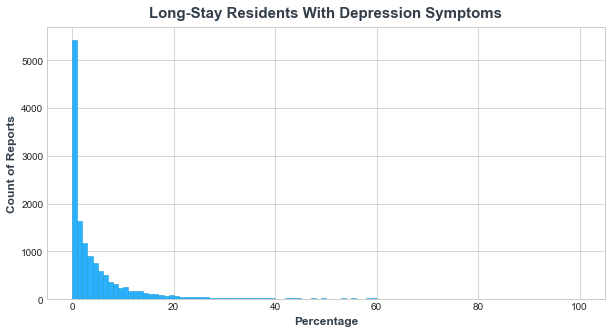

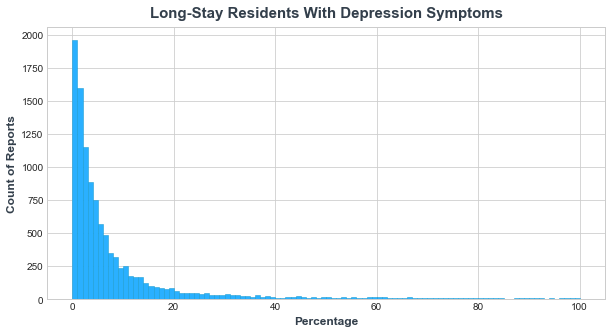

In [113]:
## Outlier included
examp = create_histogram(all_measures, 
                         '408 Percentage of long-stay residents who have depressive symptoms', 
                         'Long-Stay Residents with Depression Symptoms')

examp = create_histogram(reduce_outliers, 
                         '408 Percentage of long-stay residents who have depressive symptoms', 
                         'Long-Stay Residents with Depression Symptoms')

Depression has is far more of a right-skew than many of the other measures

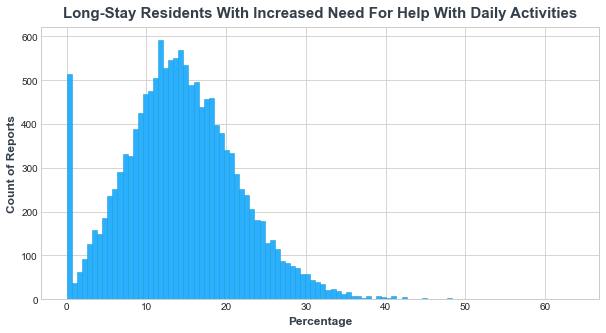

In [114]:
examp = create_histogram(all_measures, 
                         '401 Percentage of long-stay residents whose need for help with daily activities has increased', 
                         'Long-Stay Residents with Increased Need for Help with Daily Activities')

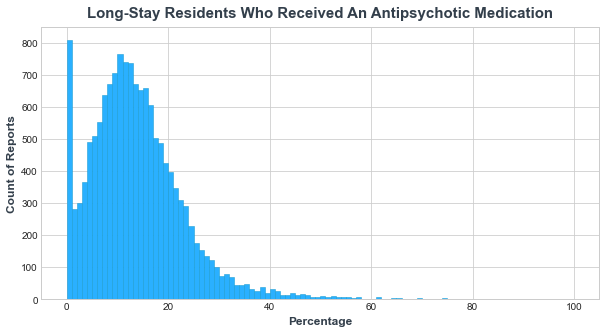

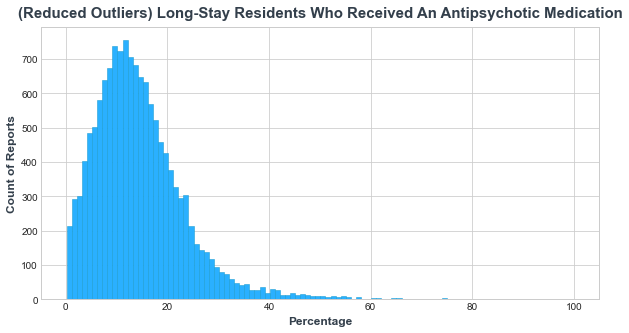

In [115]:
examp = create_histogram(all_measures, 
                         '419 Percentage of long-stay residents who received an antipsychotic medication', 
                         'long-stay residents who received an antipsychotic medication')

examp = create_histogram(reduce_outliers, 
                         '419 Percentage of long-stay residents who received an antipsychotic medication', 
                         '(Reduced Outliers) long-stay residents who received an antipsychotic medication')

We see the same trend with measurements around weight-loss. 

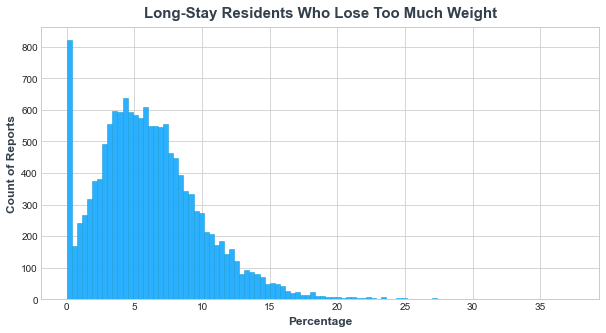

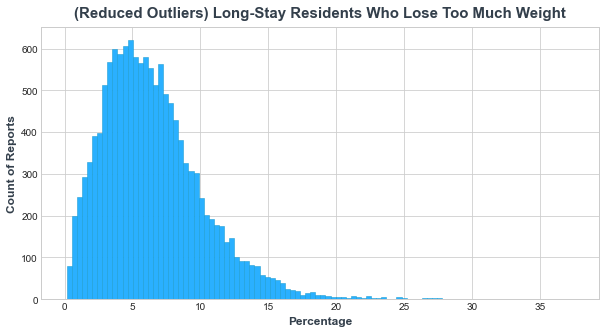

In [116]:
examp = create_histogram(all_measures, 
                         '404 Percentage of long-stay residents who lose too much weight', 
                         'long-stay residents who lose too much weight')

examp = create_histogram(reduce_outliers, 
                         '404 Percentage of long-stay residents who lose too much weight', 
                         '(Reduced Outliers) long-stay residents who lose too much weight')

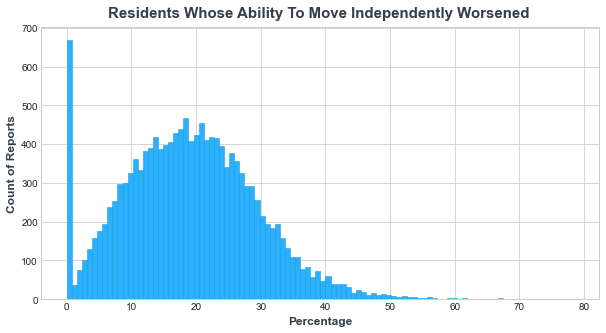

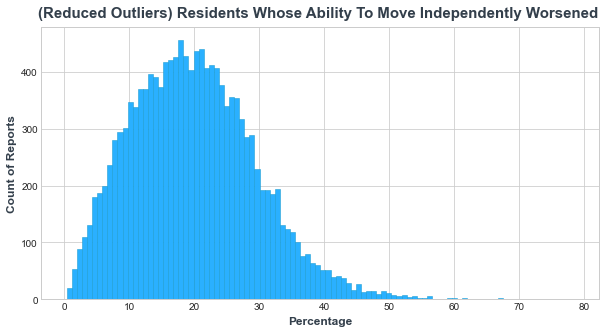

In [117]:
examp = create_histogram(all_measures, 
                         '451 Percentage of long-stay residents whose ability to move independently worsened', 
                         'residents whose ability to move independently worsened ')

examp = create_histogram(reduce_outliers, 
                         '451 Percentage of long-stay residents whose ability to move independently worsened', 
                         '(Reduced Outliers) residents whose ability to move independently worsened ')

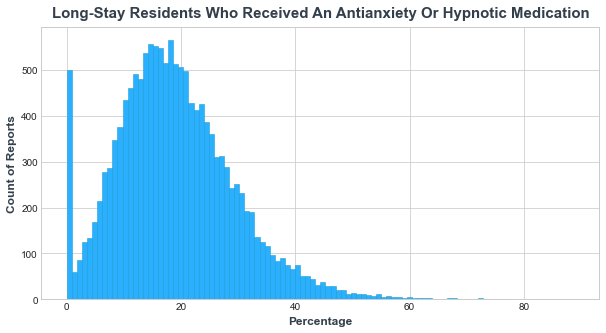

In [118]:
examp = create_histogram(all_measures, 
                         '452 Percentage of long-stay residents who received an antianxiety or hypnotic medication', 
                         'long-stay residents who received an antianxiety or hypnotic medication')

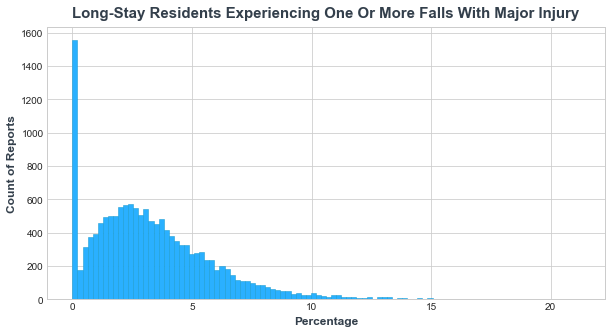

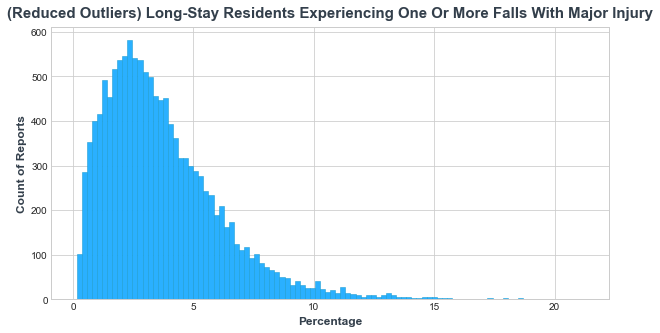

In [119]:
examp = create_histogram(all_measures, 
                         '410 Percentage of long-stay residents experiencing one or more falls with major injury', 
                         'long-stay residents experiencing one or more falls with major injury')

examp = create_histogram(reduce_outliers, 
                         '410 Percentage of long-stay residents experiencing one or more falls with major injury', 
                         '(Reduced Outliers) long-stay residents experiencing one or more falls with major injury')

## Investigating Measure Pressure Ulcers

In [ ]:
reduce_outliers['rounded percent pressure ulcers'] = reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers'].round()

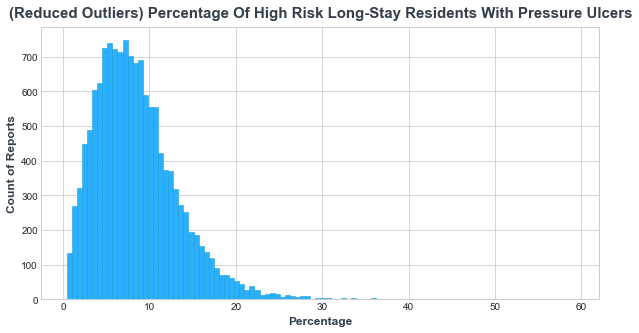

In [120]:
examp = create_histogram(reduce_outliers, 
                         '453 Percentage of high risk long-stay residents with pressure ulcers', 
                         '(Reduced Outliers) Percentage of high risk long-stay residents with pressure ulcers')

In [163]:
x = reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers']

In [266]:
print('MEAN:', x.mean().round(2))
print('TRIMMED MEAN (10%):', stats.trim_mean(x, .1).round(2))
print('ROUNDED MEDIAN:', x.round(1).median())
print('STANDARD DEVIATION:', np.std(x).round(2))
print('DATA RANGE:', min(x), 'to', max(x))
print( )
print('QUARTILES')
print(x.quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

MEAN: 8.47
TRIMMED MEAN (10%): 8.42
ROUNDED MEDIAN: 7.7
STANDARD DEVIATION: 4.84
DATA RANGE: 0.429183 to 59.160308

QUARTILES
0.05     2.127660
0.25     4.999998
0.50     7.738096
0.75    10.999999
0.95    17.133101
Name: 453 Percentage of high risk long-stay residents with pressure ulcers, dtype: float64


In [300]:
seventy_fifth = reduce_outliers[reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers'] >= 11]

In [301]:
twenty_fifth = reduce_outliers[reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers'] <= 5]

In [288]:
seventy_fifth.corrwith(seventy_fifth['453 Percentage of high risk long-stay residents with pressure ulcers']).to_frame().reset_index().sort_values(by = 0, ascending = True).tail(10)

,index,0
30,Case-Mix LPN Staffing Hours per Resident per Day,0.174398
32,Case-Mix Total Nurse Staffing Hours per Reside...,0.197136
27,Reported Total Nurse Staffing Hours per Reside...,0.205482
4,406 Percentage of long-stay residents with a c...,0.220886
25,Reported RN Staffing Hours per Resident per Day,0.222595
26,Reported Licensed Staffing Hours per Resident ...,0.262367
31,Case-Mix RN Staffing Hours per Resident per Day,0.263599
55,rounded percent pressure ulcers,0.997477
13,453 Percentage of high risk long-stay resident...,1.000000
15,Year,NaN


In [307]:
twenty_fifth[['Individual & Org Owned']].value_counts(normalize=True)

Individual & Org Owned
Yes                       0.782735
No                        0.217265
dtype: float64

In [309]:
seventy_fifth[['Individual & Org Owned']].value_counts(normalize=True)

Individual & Org Owned
Yes                       0.795978
No                        0.204022
dtype: float64

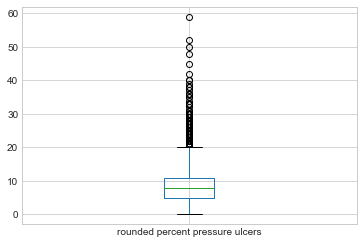

In [203]:
boxplot = reduce_outliers.boxplot(column=['rounded percent pressure ulcers']) 

In [272]:
grouped_condition = reduce_outliers.groupby('Provider State').agg({'453 Percentage of high risk long-stay residents with pressure ulcers':
                                               ['mean', lambda x: x.nunique()]}).reset_index()
grouped_condition.columns = grouped_condition.columns.get_level_values(0)
grouped_condition.columns = ['State', 'Average Percent', 'Count of Facilities']
grouped_condition = grouped_condition.sort_values(by = 'Average Percent')
bottom_5_facilities = grouped_condition.head()
top_5_facilities = grouped_condition.tail(7)
print("BOTTOM FIVE STATES")
print(bottom_5_facilities)
print( )

print("TOP FIVE STATES")
print(top_5_facilities)
print( )

BOTTOM FIVE STATES
   State  Average Percent  Count of Facilities
11    HI         5.015240                   38
21    ME         5.984159                   88
29    NE         6.014784                  157
13    ID         6.029100                   67
6     CT         6.152670                  188

TOP FIVE STATES
   State  Average Percent  Count of Facilities
27    NC        10.246345                  390
20    MD        10.588861                  203
10    GA        10.696116                  339
33    NV        10.699778                   47
25    MS        10.901201                  172
7     DC        12.308452                   14
39    PR              NaN                    0



In [238]:
reduce_outliers.corrwith(reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers']).to_frame().reset_index().sort_values(by = 0, ascending = False).head(7)
                                         
                                         

,index,0
13,453 Percentage of high risk long-stay resident...,1.000000
55,rounded percent pressure ulcers,0.998214
31,Case-Mix RN Staffing Hours per Resident per Day,0.206800
30,Case-Mix LPN Staffing Hours per Resident per Day,0.177527
2,404 Percentage of long-stay residents who lose...,0.144098
32,Case-Mix Total Nurse Staffing Hours per Reside...,0.138392
24,Reported LPN Staffing Hours per Resident per Day,0.118431


In [273]:
reduce_outliers.corrwith(reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers']).to_frame().reset_index().sort_values(by = 0, ascending = False).tail(7)
                         

,index,0
20,Health Inspection Rating,-0.082129
14,454 Percentage of long-stay residents assessed...,-0.082203
21,Staffing Rating,-0.090431
22,RN Staffing Rating,-0.093453
9,415 Percentage of long-stay residents assessed...,-0.099031
19,Overall Rating,-0.131165
15,Year,NaN


<AxesSubplot:xlabel='Number of Certified Beds', ylabel='453 Percentage of high risk long-stay residents with pressure ulcers'>

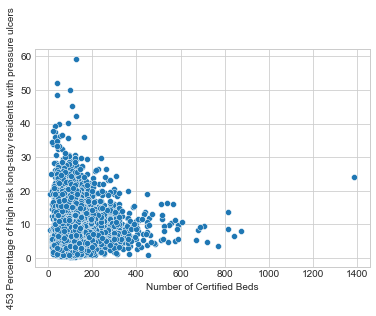

In [220]:
sn.set_style("whitegrid")
sn.scatterplot(data=reduce_outliers, 
               x="Number of Certified Beds", 
               y="453 Percentage of high risk long-stay residents with pressure ulcers")

In [221]:
allm = reduce_outliers[reduce_outliers['453 Percentage of high risk long-stay residents with pressure ulcers'].notna()]

In [240]:
#Removing all unnedeed columns
all_m = allm[['453 Percentage of high risk long-stay residents with pressure ulcers',
       'Provider State','Ownership Type', 'Number of Certified Beds',
       'Average Number of Residents per Day', 'Provider Type',
       'Provider Resides in Hospital',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'With a Resident and Family Council', 'Overall Rating',
       'Health Inspection Rating', 'Staffing Rating', 'RN Staffing Rating',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Case-Mix Nurse Aide Staffing Hours per Resident per Day',
       'Case-Mix LPN Staffing Hours per Resident per Day',
       'Case-Mix RN Staffing Hours per Resident per Day',
       'Case-Mix Total Nurse Staffing Hours per Resident per Day',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints',
       'Number of Citations from Infection Control Inspections',
       'Number of Fines', 'Total Amount of Fines in Dollars',
       'Total Number of Penalties', 'time_diff']]

### Rounding float columns

In [241]:
for column in all_m.select_dtypes(float).columns:
    all_m[column] = all_m[column].round(1)

In [242]:
all_m.select_dtypes(float).head()

,453 Percentage of high risk long-stay residents with pressure ulcers,Average Number of Residents per Day,Overall Rating,Health Inspection Rating,Staffing Rating,RN Staffing Rating,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Reported Physical Therapist Staffing Hours per Resident Per Day,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Number of Citations from Infection Control Inspections
0,8.8,51.9,5.0,5.0,5.0,5.0,2.9,0.8,0.9,1.7,4.6,NaN,2.2,0.7,0.3,3.2,NaN
1,14.9,67.5,4.0,3.0,5.0,5.0,3.0,1.0,1.0,2.0,5.0,0.0,2.0,0.7,0.3,2.9,NaN
2,5.4,36.1,3.0,2.0,5.0,5.0,3.2,0.8,1.1,1.9,5.1,0.1,2.2,0.7,0.3,3.3,NaN
3,9.5,69.9,2.0,4.0,1.0,1.0,0.9,0.3,0.3,0.7,1.5,0.0,2.0,0.7,0.3,2.9,NaN
4,13.8,85.1,3.0,3.0,3.0,2.0,2.4,1.0,0.3,1.3,3.7,0.0,1.9,0.6,0.3,2.8,NaN


### Determining if object columns are fit for onehotencoding

In [243]:
all_m.select_dtypes('object').head()

,Provider State,Ownership Type,Provider Type,Provider Resides in Hospital,Continuing Care Retirement Community,Special Focus Status,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,With a Resident and Family Council
0,AL,For profit - Corporation,Medicare and Medicaid,N,N,NaN,N,N,Both
1,AL,For profit - Corporation,Medicare and Medicaid,N,N,NaN,N,N,Both
2,AL,Government - County,Medicare and Medicaid,Y,N,NaN,N,N,Resident
3,AL,For profit - Individual,Medicare and Medicaid,N,N,NaN,N,N,Both
4,AL,For profit - Individual,Medicare and Medicaid,N,N,NaN,N,N,Resident


In [244]:
#State has 51 unique features. This could be a lot for onehotencoding
for column in all_m.select_dtypes('object').columns:
    print(column, ' - ', all_m[column].nunique(), ' unique features')

Provider State  -  51  unique features
Ownership Type  -  13  unique features
Provider Type  -  2  unique features
Provider Resides in Hospital  -  2  unique features
Continuing Care Retirement Community  -  2  unique features
Special Focus Status  -  2  unique features
Abuse Icon  -  2  unique features
Most Recent Health Inspection More Than 2 Years Ago  -  2  unique features
With a Resident and Family Council  -  4  unique features


# Model Creation

In [245]:
# Remove null values for x value - results in dropping 50 more rows
all_m = all_m[all_m['453 Percentage of high risk long-stay residents with pressure ulcers'].notnull()]

In [246]:
y = all_m['453 Percentage of high risk long-stay residents with pressure ulcers']
X = all_m.drop('453 Percentage of high risk long-stay residents with pressure ulcers', axis = 1)

In [247]:
print(y.shape)
print(X.shape)

(13724,)
(13724, 32)


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)

In [249]:
print(all_m.shape)
print(X_test.shape)
print(X_train.shape)

(13724, 33)
(4118, 32)
(9606, 32)


## Creating Baseline

In [250]:
all_m['453 Percentage of high risk long-stay residents with pressure ulcers'].mean()

8.467830078694258

In [251]:
y_pred_test = np.array(len(y_train) * [all_m['453 Percentage of high risk long-stay residents with pressure ulcers'].mean()])

In [252]:
print('Baseline to beat by assuming mean is ', round(mean_absolute_error(y_train, y_pred_test),2))

Baseline to beat by assuming mean is  3.71


## Linear Regression

In [253]:
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('linear_model', linear_model.LinearRegression())])

In [254]:
lr_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('linear_model', linear_model.LinearRegression())])
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

lr_end = time.time()
print(f"Runtime of the lr model is {lr_end - lr_start}")

0.7165372780283331
6.350822333667807
Runtime of the lr model is 1.892242193222046


<AxesSubplot:>

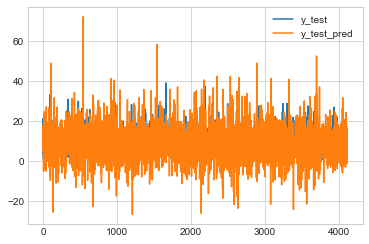

In [255]:
diff = pd.DataFrame(list(zip(y_test, y_test_pred)), columns = ['y_test', 'y_test_pred'])
diff.plot()

## Gradient Boosting

In [325]:
gr_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('linear_model', GradientBoostingRegressor(random_state=0, 
                                                            learning_rate = 0.1,
                                                            max_depth = 9,
                                                            n_estimators = 50))])

pipe.fit(X_train, y_train)
gb_y_train_pred = pipe.predict(X_train)
gb_y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_train, gb_y_train_pred))
print(mean_absolute_error(y_test, gb_y_test_pred))

gr_end = time.time()
print(f"Runtime of the gr model is {gr_end - gr_start}")

3.154100160958398
3.4895641249165528
Runtime of the gr model is 2.802603006362915


In [332]:
gradient_b_outcome = pd.DataFrame({'y_test': y_test,'y_test_pred':gb_y_test_pred})
gradient_b_outcome.sort_values(by = 'y_test', ascending = False).head(5)

,y_test,y_test_pred
13444,39.1,7.112297
9113,37.5,13.550180
8877,33.9,14.282555
4455,33.3,9.598410
7041,30.8,9.688353


## Ridge Regression

In [320]:
rr_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('linear_model', Ridge(alpha=8))])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

rr_end = time.time()
print(f"Runtime of the ridge model is {rr_end - rr_start}")

2.8171540809692046
3.55001316396884
Runtime of the ridge model is 0.19553494453430176


In [321]:
ridge_regression_outcome = pd.DataFrame({'y_test': y_test,'y_test_pred':y_test_pred})
ridge_regression_outcome.sort_values(by = 'y_test', ascending = False)

## Lasso Regression

In [258]:
lass_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('linear_model', linear_model.Lasso(alpha=0.1))])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

lass_end = time.time()
print(f"Runtime of the lasso model is {lass_end - lass_start}")

3.6730169049123345
3.6302841539786503
Runtime of the lasso model is 0.7740638256072998


## Random Forrest Regression

In [329]:
random_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('forest_model', RandomForestRegressor(max_depth=50, n_estimators=200))])

pipe.fit(X_train, y_train)
rf_y_train_pred = pipe.predict(X_train)
rf_y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_train, rf_y_train_pred))
print(mean_absolute_error(y_test, rf_y_test_pred))

random_end = time.time()
print(f"Runtime of the random forrest model is {random_end - random_start}")

2.474549126139426
3.4629997107679005
Runtime of the random forrest model is 120.74041390419006


In [330]:
rf_outcome = pd.DataFrame({'y_test': y_test,'y_test_pred':rf_y_test_pred})
rf_outcome.sort_values(by = 'y_test', ascending = False).head(15)

,y_test,y_test_pred
13444,39.1,8.412777
9113,37.5,10.482637
8877,33.9,23.787441
4455,33.3,8.658276
7041,30.8,8.929308
4737,30.6,7.775796
13458,29.9,10.021613
6006,29.5,12.838611
697,28.8,11.081754
7062,28.7,9.566193


In [98]:
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('forest_model', RandomForestRegressor())])

param_grid = {
    "forest_model__n_estimators": [50, 100, 150, 200, 250],
    "forest_model__max_depth": [10, 50, 100]
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_test, y_test)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.063):
{'forest_model__max_depth': 50, 'forest_model__n_estimators': 200}


# Refining Model

After testing a few models, Gradient Boosting was performing the best out of all of the initial tests and beating the basline linear regression model by about 5%. At this point, I decided to use Gradient Boosting and improve the parameters on that model as much as possible.

In [261]:
gr_start = time.time()
pipe = Pipeline([('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                 ('gb_model', GradientBoostingRegressor(random_state=0, 
                                                            n_estimators = 100,
                                                       max_depth = 6,
                                                       learning_rate = 0.1))])

pipe.fit(X_train, y_train)
param_grid = {
    "gb_model__n_estimators": [50, 100, 150, 200, 250, 300],
    "gb_model__learning_rate": [.001, .01, .1],
    "gb_model__max_depth": [3, 6, 9, 12]
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_test, y_test)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.045):
{'gb_model__learning_rate': 0.1, 'gb_model__max_depth': 9, 'gb_model__n_estimators': 50}


In [340]:
results = {
    'Linear Regression' : 6.35,
    'Ridge Regression' : 3.55,
    'Gradient Boosting' : 3.48,
    'Random Forrest' : 3.46,
    }
  
df = pd.DataFrame(list(details.items()), columns = ['Algorithm', 'MAE on Testing Data'])
  
df

,Algorithm,MAE on Testing Data
0,Linear Regression,6.35
1,Ridge Regression,3.55
2,Gradient Boosting,3.48
3,Random Forrest,3.46
